In [128]:
from qutip import *
import numpy as np
import math
#import kaleidoscope.qiskit
#from kaleidoscope import bloch_sphere

In [129]:
p = 0.1
epsilon = 0.2
Delta = 1
N = 20
tau = np.pi/N
hbar = 1


In [130]:
zero_k=basis(2,0)
one_k=basis(2,1)
plus_k = (zero_k+one_k)/np.sqrt(2)
minus_k = (zero_k-one_k)/np.sqrt(2)


In [131]:
rho0 = (1-p)*zero_k*zero_k.dag() + p*one_k*one_k.dag()

Mplus0 = np.sqrt(1/2+epsilon)*plus_k*plus_k.dag() + np.sqrt(1/2-epsilon)*minus_k*minus_k.dag()
Mplus1 = np.sqrt(1/2-epsilon)*plus_k*plus_k.dag() + np.sqrt(1/2+epsilon)*minus_k*minus_k.dag()

H = hbar*Delta*sigmay()
HH=-1j*tau*H/hbar
U = HH.expm()

In [132]:
def mixed_measure(rho: Qobj, M) -> Qobj:
    rhoM = Qobj()
    for Mm in M:
        rhoM += Mm*rho*Mm.dag()


    return rhoM

In [133]:
def plot_bloch(rho: Qobj):
    b=Bloch()

    ss1=sigmax()*rho
    ss2=sigmay()*rho
    ss3=sigmaz()*rho
    bloch=[ss1.tr().real,ss2.tr().real,ss3.tr().real]
    b.add_vectors(bloch)
    b.show()

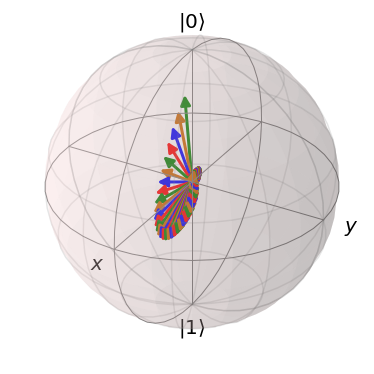

In [134]:
rhoN = rho0
b=Bloch()

for n in range(N):
    # evolve state by hamiltonian for time tau
    rhoN=U*rhoN*U.dag()
    # perform weak measurement on state
    rhoN = mixed_measure(rhoN,[Mplus0,Mplus1])
    ss1=sigmax()*rhoN
    ss2=sigmay()*rhoN
    ss3=sigmaz()*rhoN
    bloch=[ss1.tr().real,ss2.tr().real,ss3.tr().real]
    b.add_vectors(bloch)

b.show()

